In [1]:
import tensorflow as tf

# Introduction to Keras-TensorFlow

## First steps with TensorFlow

### Constant tensors and variables

#### Ones and zeros

In [2]:
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


#### Random tensors

In [4]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.3384881 ]
 [ 1.7182436 ]
 [ 0.36790192]], shape=(3, 1), dtype=float32)


In [5]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.79206264]
 [0.33412766]
 [0.02529824]], shape=(3, 1), dtype=float32)


In [6]:
x[0] = 1

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [7]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.0441976],
       [-1.0795966],
       [-1.463908 ]], dtype=float32)>


In [8]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [10]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

### Tensor operations

#### Basic math operations

In [11]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [12]:
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

#### Taking the gradient using `GradientTape`

##### Computing the gradient with variable inputs

In [13]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [14]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

##### Computing the gradient with constant tensor inputs

In [15]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [16]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

##### Nested gradient tapes to compute second-order gradients

In [17]:
time = tf.Variable(1.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [18]:
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

### Example 1: A linear classifier in pure TensorFlow

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#### Generating dummy datasets

In [20]:
# Set the numebr of class
num_samples_per_class = 1000

# Set the negative samples
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

# Set the positive samples
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

# Set the inputs and the targets
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

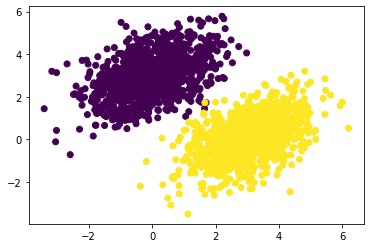

In [21]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Solve the problem using a linear classifier defined by:

$$
y = Wx + b
$$

In [23]:
# Define the input and output dimensions
input_dim = 2
output_dim = 1

# Initialize weights and biases
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# Define the model; this is essentially the forward-propagation
def model(inputs):
    return tf.matmul(inputs, W) + b

# Define the loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)

    return tf.reduce_mean(per_sample_losses)

# Define the training step
def training_step(inputs, targets, learning_rate=0.1):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)

    return loss

# Perform batch training
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 6.2053
Loss at step 1: 0.7613
Loss at step 2: 0.2269
Loss at step 3: 0.1544
Loss at step 4: 0.1370
Loss at step 5: 0.1267
Loss at step 6: 0.1180
Loss at step 7: 0.1101
Loss at step 8: 0.1029
Loss at step 9: 0.0963
Loss at step 10: 0.0903
Loss at step 11: 0.0848
Loss at step 12: 0.0797
Loss at step 13: 0.0751
Loss at step 14: 0.0709
Loss at step 15: 0.0671
Loss at step 16: 0.0636
Loss at step 17: 0.0604
Loss at step 18: 0.0574
Loss at step 19: 0.0547
Loss at step 20: 0.0523
Loss at step 21: 0.0500
Loss at step 22: 0.0480
Loss at step 23: 0.0461
Loss at step 24: 0.0444
Loss at step 25: 0.0428
Loss at step 26: 0.0414
Loss at step 27: 0.0401
Loss at step 28: 0.0389
Loss at step 29: 0.0378
Loss at step 30: 0.0368
Loss at step 31: 0.0358
Loss at step 32: 0.0350
Loss at step 33: 0.0342
Loss at step 34: 0.0335
Loss at step 35: 0.0329
Loss at step 36: 0.0323
Loss at step 37: 0.0318
Loss at step 38: 0.0313
Loss at step 39: 0.0308


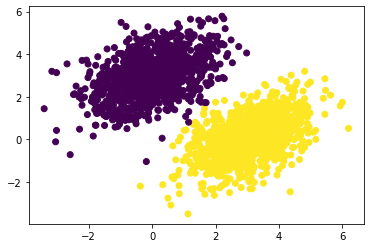

In [24]:
# Generate predictions
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

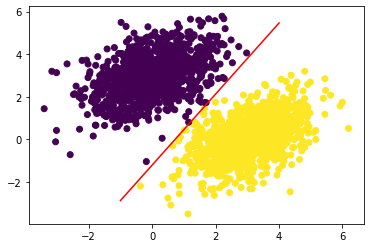

In [25]:
# Generate decision boundary line
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]

plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5);

## Keras API

There are three APIs for building models in Keras:

1. The **Sequential model**, the most approachable API - which basically constructs a Python list containing the different layers that you want to use.
2. The **Functional API**, which focuses on grpah-like model architectures. It represents a nice mid-point between useability and flexibility, and as such, its the most commonly used model-building API.
3. **Model subclassing**, a low-level option where you write everything yourself from scratch.

### MNIST Dataset

In [26]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [27]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [28]:
train_images.shape

(60000, 784)

Image label: 4


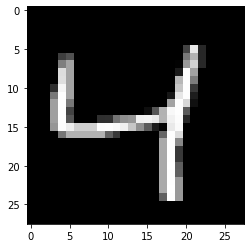

In [29]:
sample_number = 2

plt.imshow(train_images[sample_number].reshape(28, 28, 1), cmap='gray')
print(f"Image label: {train_labels[sample_number]}")

### Sequential model

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

# Define using layers API
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [31]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [32]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2568 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1037 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9802
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0495 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0372 - accuracy: 0.9888


Predicted: 7
Actual: 7


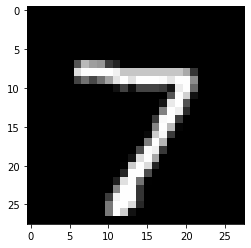

In [33]:
# Select the first 10 images
test_digits = test_images[0:10]

# Get the model predictions
predictions = model.predict(test_digits)

# Look at a specific sample number
sample_number = 0

prediction = np.argmax(predictions[sample_number])
actual = test_labels[sample_number]

plt.imshow(test_images[sample_number].reshape(28, 28, 1), cmap='gray')
print(f"Predicted: {prediction}\nActual: {actual}")

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9796
Test accuracy: 0.980


### Functional API

In [35]:
inputs = keras.Input(shape=(28 * 28,))

x = layers.Dense(512, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [36]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [38]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2547 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0501 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0375 - accuracy: 0.9891


In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0635 - accuracy: 0.9804
Test accuracy: 0.980


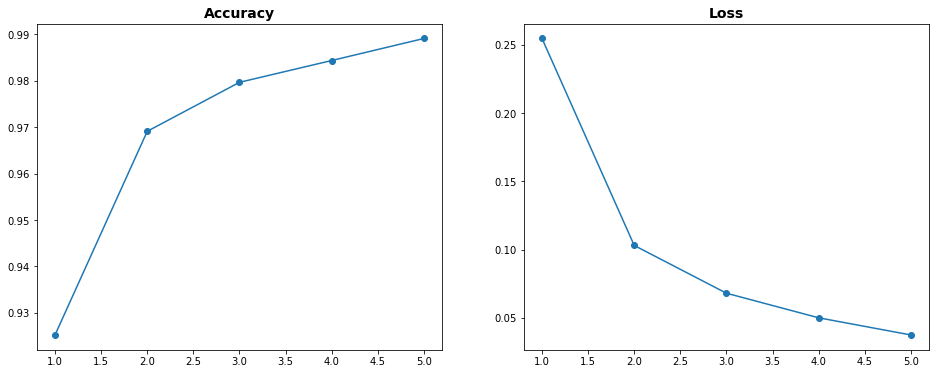

In [42]:
accuracy = history.history['accuracy']
epochs = range(1, len(accuracy) + 1)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].plot(epochs, history.history['accuracy'], 'o-')
axes[1].plot(epochs, history.history['loss'], 'o-')

# Some axes labeling and prettification
axes[0].set_title("Accuracy", fontsize=14, weight='bold')
axes[1].set_title("Loss", fontsize=14, weight='bold')